# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import  optimize
import pandas as pd

In [116]:
r = lambda R: (((g/b) + vox) * (R/vox)) + (g/(b**2)) * np.log(1-((R*b)/vox))

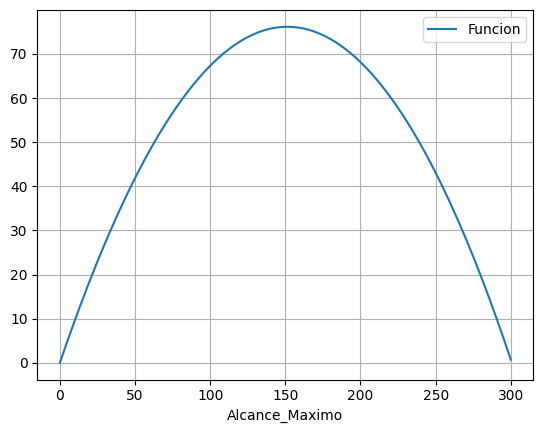

In [117]:
R = np.linspace(0,300,10000)
y = r(R)
d = {"Alcance_Maximo": R, "Funcion": y}
df = pd.DataFrame(d)
df.plot.line(x = "Alcance_Maximo", y = "Funcion")
plt.grid()
plt.show()

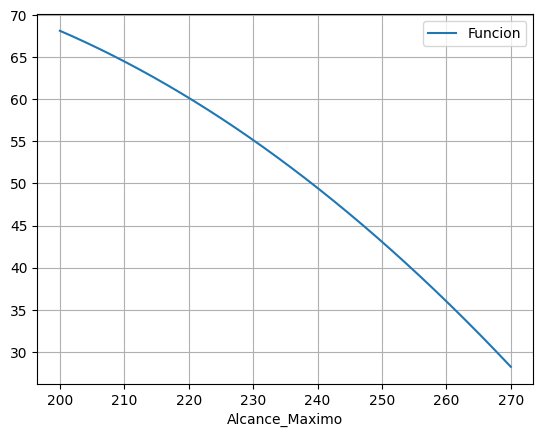

In [118]:
df_filtro = df[df.Alcance_Maximo.between(200,270)]
df_filtro.plot.line(x ="Alcance_Maximo", y = "Funcion")
plt.grid()
plt.show()

In [119]:
def R(vox,voy,b,g): # Alcance Maximo
  # utilizando la ecuacion transcendental , bucaremos cual es el valor de R caundo y = 0
  r1 = optimize.newton(r, 230)
  return r1

In [120]:
def R2(vox,voy,b,g): # Utilizando otro metodo
  fixed_r = lambda R : R - r(R)
  r2 = optimize.fixed_point(fixed_r,230)
  return r2

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [152]:
def tv(r,vox,b):
  t = (-1/b) *(np.log(1-(r*b)/vox))
  return t


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}



\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}

In [158]:
def mov(t,vox,voy,b,g):
  x = (vox/b) * (1-np.exp(-b*t))
  y1 = (1/b)
  y2 = ((g/b)+voy)
  y3 = (1-np.exp(-b*t))
  y4 = (g/b)*t
  y = (y1 * y2 *y3) - y4
  return x,y

In [147]:
vo = 55 # Velocidad inicial
theta_grados = 45
theta = np.deg2rad(theta_grados) # Angulo de lanzamiento
vox = vo * np.cos(theta) # Eje x
voy = vo * np.sin(theta) # Eje y
g = 9.8 # Gravedad de la tierra
b = 0.005 # Coeficiente de rozamiento con el aire

In [126]:
R(vox,voy,b,g) # Primer Metodo

300.6920766931864

In [125]:
R2(vox,voy,b,g) # Segundo Metodo y comprobacion

array(300.69207669)

In [137]:
r(h)

2.1827872842550278e-11

In [154]:
h = R(vox,voy,b,g) # Asignacion a una variable para luego utilizarla
t = tv(h,vox,b)
print("El tiempo maximo {:.2f}".format(t))

El tiempo maximo 7.89


In [165]:
mov(t,vox,voy,b,g)

(300.69207669318604, 5.4569682106375694e-12)

In [159]:
T = np.linspace(0,t,10000)
X = []
Y = []
for i in T:
  x_,y_= mov(i,vox,voy,b,g)
  X.append(x_)
  Y.append(y_)

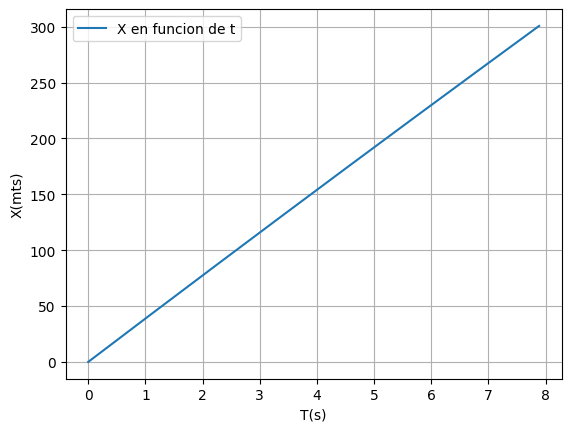

In [161]:
plt.plot(T,X,label = "X en funcion de t")
plt.grid()
plt.legend()
plt.xlabel("T(s)")
plt.ylabel("X(mts)")
plt.show()

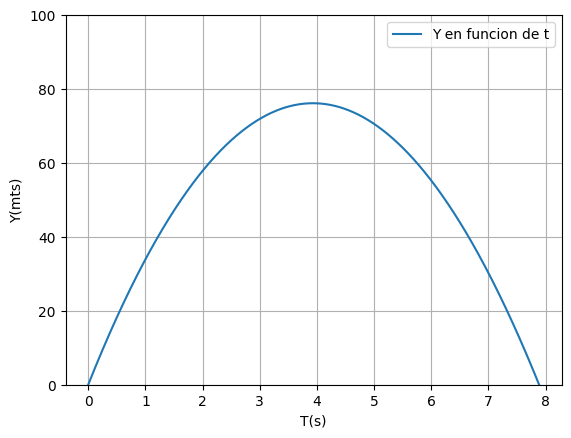

In [162]:
plt.plot(T,Y,label = "Y en funcion de t")
plt.grid()
plt.legend()
plt.xlabel("T(s)")
plt.ylabel("Y(mts)")
plt.ylim(0,100)
plt.show()

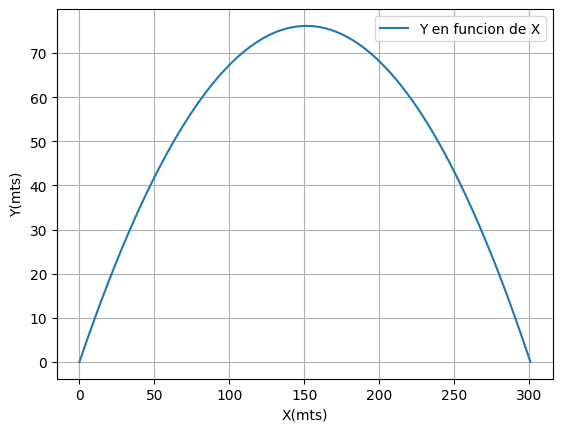

In [166]:
plt.plot(X,Y,label = "Y en funcion de X")
plt.grid()
plt.legend()
plt.xlabel("X(mts)")
plt.ylabel("Y(mts)")
plt.show()

In [ ]:
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
x_ =[]
y = []
for r in theta:
  vox = vo * np.cos(theta)
  voy = vo * np.sin(theta)
  x, y mov(i,vox,voy,b,g)
  x_.append(x)
  y_.append(y)


In [ ]:
plt.plot()